## Agregación de datos

In [18]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('netflix_titles_2.csv')

In [22]:
df.describe()

,Unnamed: 0,release_year,duration_num
count,8807.000000,8807.000000,8807.000000
mean,4403.000000,2014.180198,69.848530
std,2542.506244,8.819312,50.806431
min,0.000000,1925.000000,1.000000
25%,2201.500000,2013.000000,2.000000
50%,4403.000000,2017.000000,88.000000
75%,6604.500000,2019.000000,106.000000
max,8806.000000,2021.000000,312.000000


In [25]:
#Se elimina la columna con.drop
df.drop('Unnamed: 0', axis= 'columns', inplace=True)

In [26]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [137]:
#También se pueden obtener las estadisticas aisladas
print("Media=",df['duration_num'].mean())
print("Min=",df['duration_num'].min())
print("Max=",df['duration_num'].max())

Media= 99.91319835020623
Min= 1.0
Max= 253.0


In [28]:
#Agregación de datos, si es pelicula (min) o serie (season)
#Cuente cuantos son
df.groupby("duration_unit").size()

duration_unit
min       6131
season    2676
dtype: int64

<Axes: xlabel='duration_unit'>

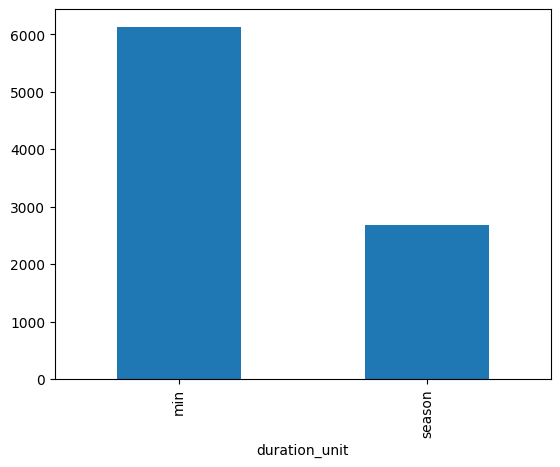

In [29]:
#Un grafico simple de barras del numero de peliculas y series
df.groupby("duration_unit").size().plot.bar()

In [30]:
#Como calcular el total en horas tanto de peliculas como series
#Las series vienen en minutos, por lo que el numero total simplemente se debería dividir para 60 minutos

#También se puede hacer la suma
movies_minutes = df.loc[df["duration_unit"]=="min", "duration_num"].sum()

#Muestra la estadisticas con 2 decimales
print(f"Total Minutes for Movies = {movies_minutes:.2f}")
print(f"Total Hours for Movies = {movies_minutes/60:.2f}")


Total Minutes for Movies = 610433.00
Total Hours for Movies = 10173.88


In [31]:
#Se asume que cada season tiene un promedio de 7 episodios, y cada episodio dura 30 min...

#Largo en minutos
len_season_min = 7 * 30
#Largo en horas de una season
len_season_hr = len_season_min/60
print(len_season_hr)

3.5


In [32]:
#Calcula el total de Seasons del dataset
total_series = df.loc[df['duration_unit']== 'season','duration_num'].sum()
print("Total de Horas en Seasons= ",total_series)

#Ahora se multiplica el total de Seasons por el largo de cada season
total_movies_hr = total_series * len_season_hr
print("Total de Horas en Series= ",total_movies_hr)

Total de Horas en Seasons=  4723.0
Total de Horas en Series=  16530.5


In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season


In [34]:
#Otra pregunta, las preguntas son más largas según su rating?
df[['title', 'country', 'release_year','duration_num','rating']].loc[(df['duration_unit']=='min')]

,title,country,release_year,duration_num,rating
0,Dick Johnson Is Dead,United States,2020,90.0,PG-13
6,My Little Pony: A New Generation,NaN,2021,91.0,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0,TV-MA
9,The Starling,United States,2021,104.0,PG-13
12,Je Suis Karl,"Germany, Czech Republic",2021,127.0,TV-MA
...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96.0,TV-MA
8802,Zodiac,United States,2007,158.0,R
8804,Zombieland,United States,2009,88.0,R
8805,Zoom,United States,2006,88.0,PG


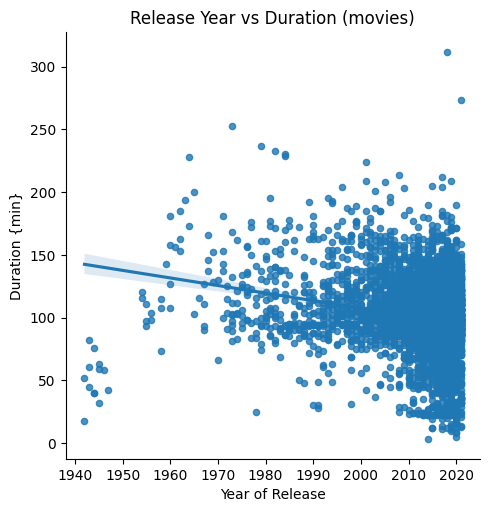

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = df[['title', 'country', 'release_year','duration_num','rating']].loc[(df['duration_unit']=='min')]

sns.lmplot(x= 'release_year', y='duration_num',data=df_movies,fit_reg=True, scatter_kws={"marker":"D","s":20})

plt.title('Release Year vs Duration (movies)')
plt.xlabel('Year of Release')
plt.ylabel('Duration {min}')
plt.show()

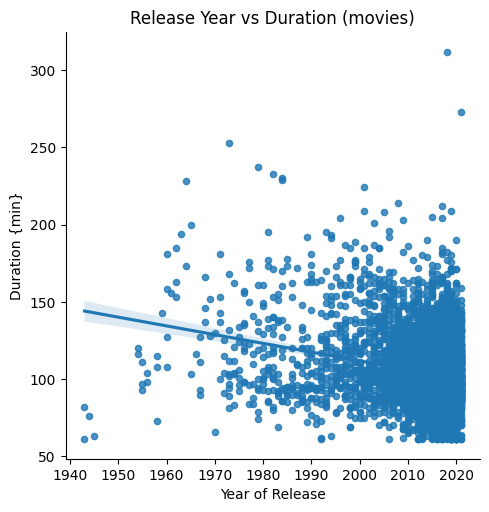

In [37]:
#Que pasaría si es que se toman en cuenta nada más peliculas de por lo menos 60 minutos?

df_movies2 = df[['title', 'country', 'release_year','duration_num','rating']].loc[(df['duration_unit']=='min') & (df['duration_num'] > 60)]

sns.lmplot(x= 'release_year', y='duration_num',data=df_movies2,fit_reg=True, scatter_kws={"marker":"D","s":20})

plt.title('Release Year vs Duration (movies)')
plt.xlabel('Year of Release')
plt.ylabel('Duration {min}')
plt.show()

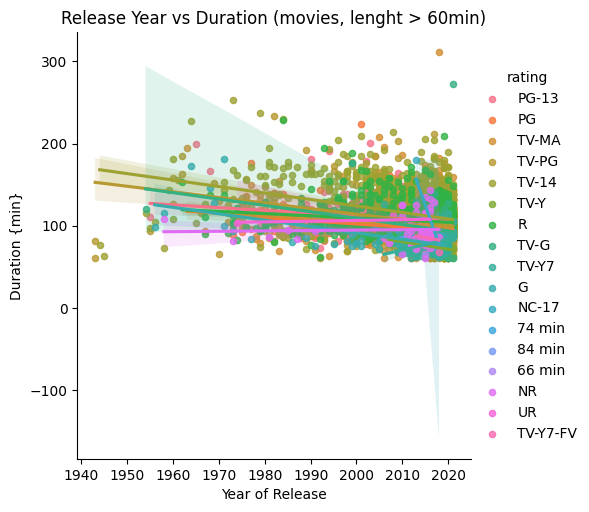

In [38]:
#Contesto la pregunta anterior
df_movies2 = df[['title', 'country', 'release_year','duration_num','rating']].loc[(df['duration_unit']=='min') & (df['duration_num'] > 60)]

sns.lmplot(x= 'release_year', y='duration_num',data=df_movies2, hue='rating',fit_reg=True, scatter_kws={"marker":"D","s":20})

plt.title('Release Year vs Duration (movies, lenght > 60min)')
plt.xlabel('Year of Release')
plt.ylabel('Duration {min}')
plt.show()

In [41]:
#Agrupaciones simples
df.groupby("type").count()['show_id']

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [42]:
#Peliculas por país
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

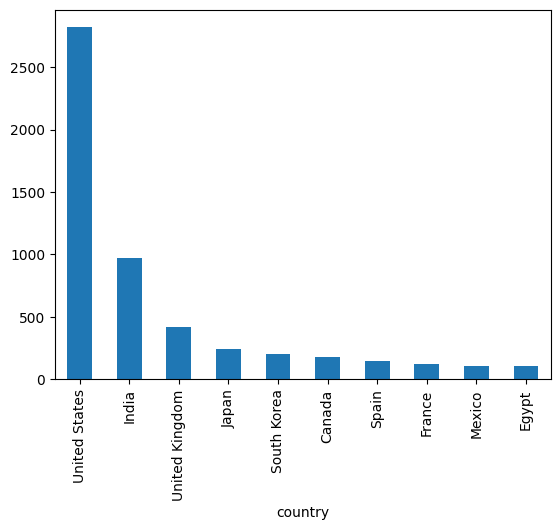

In [44]:
#Peliculas por pais. Gráfico de Barras.
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10].plot.bar()

<Axes: ylabel='show_id'>

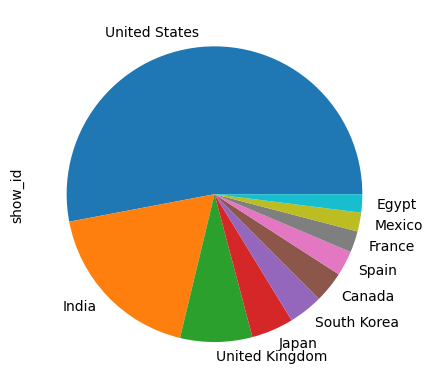

In [45]:
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10].plot.pie()

In [47]:
#Peliculas por raiting
df.groupby("rating").count()["show_id"].sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: show_id, dtype: int64

In [48]:
df.groupby("rating").count()["show_id"].sort_values(ascending=False)[0:5]

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: show_id, dtype: int64

<Axes: ylabel='show_id'>

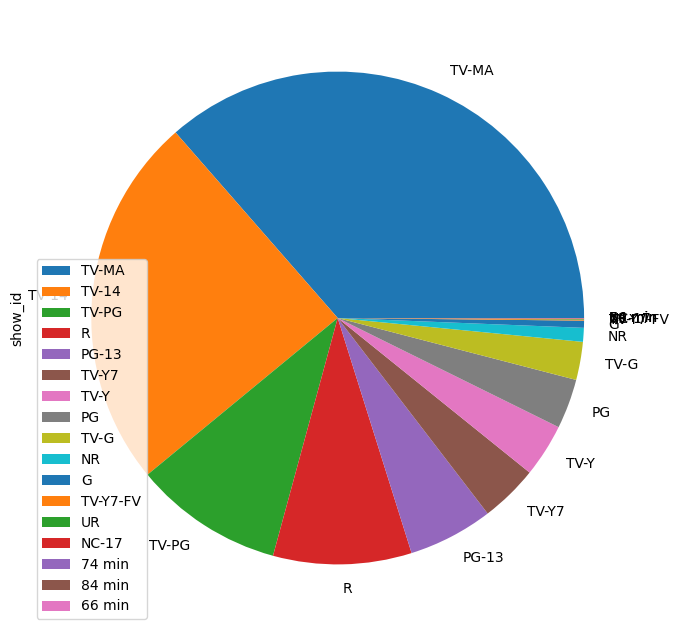

In [49]:
df.groupby("rating").count()["show_id"].sort_values(ascending=False).plot.pie(y='rating',figsize=(8,8),legend=True)

## Combinación y Manejo de Dataframes

In [65]:
#Nuevo DataFrame
clase = [('Jorge', 22, 'MX'),
         ('Anita', 31, 'MX'),
         ('Raul', 16, 'BR'),
         ('Simon', 41, 'BR'),
         ('Diego', 33, 'PA'),
         ('Jorge', 35, 'PA'),
         ('Almendra', 35, 'COL'),
         ('Mary', 35, 'COL'),
         ('Peter', 35, 'EC'),
         ('Andrés', 35, 'EC')
         ]

df_clase = pd.DataFrame(clase, columns = ['Nombre', 'Edad', 'País'],)

In [68]:
#Dataframe 2, con otra clase
clase2 = [('Mauricio', 25, 'MX'),
         ('Gladys', 41, 'PA'),
         ('Sebastian', 36, 'BR')
         ]

df_clase2 = pd.DataFrame(clase2, columns = ['Nombre', 'Edad', 'País'],)

In [66]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [69]:
df_clase2

,Nombre,Edad,País
0,Mauricio,25,MX
1,Gladys,41,PA
2,Sebastian,36,BR


In [70]:
#Con el uso del comando append, se puede combinar 2 dataframes
pd.concat([df_clase, df_clase2])

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [71]:
df_clase = pd.concat([df_clase, df_clase2])

In [72]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [74]:
#Reindexación
df_clase.reset_index(level=None, drop=True, inplace=True)

In [75]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [76]:
df_claseElim = df_clase

In [77]:
#Eliminar registro numero 2 utilizando drop
df_claseElim.drop(2).head()

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA


In [79]:
df_claseElim = df_claseElim.drop(2)

In [81]:
df_claseElim.head()

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA


In [82]:
#Elimina dos al mismo tiempo
df_claseElim.drop([7,8], axis=0, inplace=True)

In [83]:
df_claseElim

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
9,Andrés,35,EC
10,Mauricio,25,MX
11,Gladys,41,PA
12,Sebastian,36,BR


In [86]:
df_claseElim[df_claseElim['Edad']<40]

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
9,Andrés,35,EC
10,Mauricio,25,MX
12,Sebastian,36,BR


In [88]:
#Drop con condición
#Se elimina a todos los alumnos menores a 40 años
df_claseElim.drop(df_claseElim[df_claseElim['Edad']<40].index, inplace =True)

In [89]:
df_claseElim

,Nombre,Edad,País
3,Simon,41,BR
11,Gladys,41,PA


In [90]:
#Actualizacion de datos
df_claseUpd = df_clase

In [91]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [92]:
#Actualizar datos de un dataframe
#Usando iloc
df_claseUpd.loc[3,"Nombre"] = "Ramón"

In [93]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Ramón,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [96]:
#Condición
df_claseUpd[df_claseUpd['Edad']==41].index

Index([3, 11], dtype='int64')

In [97]:
#Actualizar basado en condición
#Rebaja un año la edad
df_claseUpd.loc[(df_claseUpd[df_claseUpd['Edad']==41].index),'Edad'] = 40

In [98]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Ramón,40,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,35,EC
9,Andrés,35,EC


In [99]:
#Merge de DataFrames
clase = [('Jorge', 22, 'MX'),
         ('Anita', 31, 'MX'),
         ('Raul', 16, 'BR'),
         ('Simon', 41, 'BR'),
         ('Diego', 33, 'PA'),
         ('Jorge', 35, 'PA'),
         ('Almendra', 35, 'COL'),
         ('Mary', 37, 'COL'),
         ('Peter', 40, 'EC'),
         ('Andrés', 48, 'EC')
         ]

df_clase3 = pd.DataFrame(clase, columns = ['Nombre', 'Edad', 'País'],)

In [100]:
clase = [('Jorge', 122, 'MX'),
         ('Anita', 131, 'MX'),
         ('Raul', 116, 'BR'),
         ('Simon', 141, 'BR'),
         ]

df_clase4 = pd.DataFrame(clase, columns = ['Nombre', 'Edad', 'País'],)

In [101]:
df_clase3

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,37,COL
8,Peter,40,EC
9,Andrés,48,EC


In [102]:
df_clase4

,Nombre,Edad,País
0,Jorge,122,MX
1,Anita,131,MX
2,Raul,116,BR
3,Simon,141,BR


In [103]:
df_clase3.merge(df_clase4, left_on='Nombre', right_on='Nombre')

,Nombre,Edad_x,País_x,Edad_y,País_y
0,Jorge,22,MX,122,MX
1,Jorge,35,PA,122,MX
2,Anita,31,MX,131,MX
3,Raul,16,BR,116,BR
4,Simon,41,BR,141,BR


In [104]:
df_clase3.merge(df_clase4, how='inner', on='Nombre' )

,Nombre,Edad_x,País_x,Edad_y,País_y
0,Jorge,22,MX,122,MX
1,Jorge,35,PA,122,MX
2,Anita,31,MX,131,MX
3,Raul,16,BR,116,BR
4,Simon,41,BR,141,BR


In [105]:
#Producto Cartesiano
df_clase3.merge(df_clase4, how='cross')

,Nombre_x,Edad_x,País_x,Nombre_y,Edad_y,País_y
0,Jorge,22,MX,Jorge,122,MX
1,Jorge,22,MX,Anita,131,MX
2,Jorge,22,MX,Raul,116,BR
3,Jorge,22,MX,Simon,141,BR
4,Anita,31,MX,Jorge,122,MX
5,Anita,31,MX,Anita,131,MX
6,Anita,31,MX,Raul,116,BR
7,Anita,31,MX,Simon,141,BR
8,Raul,16,BR,Jorge,122,MX
9,Raul,16,BR,Anita,131,MX


## Lambda Functions y Dataframes

In [117]:
#Nuevo Dataframe
clase = [('Jorge', 22, 'MX'),
         ('Anita', 31, 'MX'),
         ('Raul', 16, 'BR'),
         ('Simon', 41, 'BR'),
         ('Diego', 33, 'PA'),
         ('Jorge', 35, 'PA'),
         ('Almendra', 35, 'CO'),
         ('Mary', 37, 'CO'),
         ('Peter', 40, 'EC'),
         ('Andrés', 48, 'EC')
         ]

df_clase = pd.DataFrame(clase, columns = ['Nombre', 'Edad', 'País'],)

In [118]:
#Buscando si la edad es par o impar
df_clase['Par-Impar'] = df_clase['Edad'].apply(lambda x:"Impar" if int(x) % 2 else "Par")
#En este caso, Edad se envia como parámetro a la función lambda, que busca si edad / 2 es entero o no

In [108]:
df_clase

,Nombre,Edad,País,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,Impar
2,Raul,16,BR,Par
3,Simon,41,BR,Impar
4,Diego,33,PA,Impar
5,Jorge,35,PA,Impar
6,Almendra,35,COL,Impar
7,Mary,37,COL,Impar
8,Peter,40,EC,Par
9,Andrés,48,EC,Par


In [109]:
df_clase.groupby("Par-Impar").count()["Nombre"]

Par-Impar
Impar    6
Par      4
Name: Nombre, dtype: int64

<Axes: xlabel='Par-Impar'>

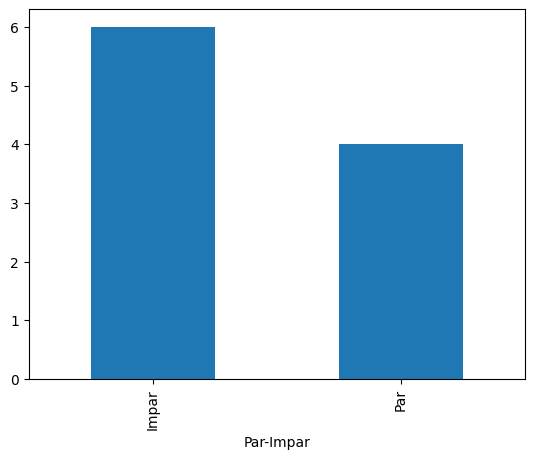

In [110]:
df_clase.groupby("Par-Impar").count()["Nombre"].plot.bar()

In [111]:
df_clase

,Nombre,Edad,País,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,Impar
2,Raul,16,BR,Par
3,Simon,41,BR,Impar
4,Diego,33,PA,Impar
5,Jorge,35,PA,Impar
6,Almendra,35,COL,Impar
7,Mary,37,COL,Impar
8,Peter,40,EC,Par
9,Andrés,48,EC,Par


In [119]:
#Ejemplo lambda 2: Descuento del 10% para mayores de 37 años
df_clase["Dcto"] = df_clase["Edad"].apply(lambda x:0.1 if x > 40 else 0.0)

In [113]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto
0,Jorge,22,MX,Par,0.0
1,Anita,31,MX,Impar,0.0
2,Raul,16,BR,Par,0.0
3,Simon,41,BR,Impar,0.1
4,Diego,33,PA,Impar,0.0
5,Jorge,35,PA,Impar,0.0
6,Almendra,35,COL,Impar,0.0
7,Mary,37,COL,Impar,0.0
8,Peter,40,EC,Par,0.0
9,Andrés,48,EC,Par,0.1


In [120]:
#Ejemplo lambda 3: Zona horario
import pytz

df_clase["ZonaHoraria"] = df_clase["País"].apply(lambda x:pytz.country_timezones[x])

In [121]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/..."
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/..."
2,Raul,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta..."
3,Simon,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta..."
4,Diego,33,PA,Impar,0.0,[America/Panama]
5,Jorge,35,PA,Impar,0.0,[America/Panama]
6,Almendra,35,CO,Impar,0.0,[America/Bogota]
7,Mary,37,CO,Impar,0.0,[America/Bogota]
8,Peter,40,EC,Par,0.0,"[America/Guayaquil, Pacific/Galapagos]"
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]"


In [123]:
#Finalmente se obtiene la capital de cada país, en el caso de que se tengan que generar comunicados o envios fisicos
#Primero, se instala la libreria pip install countryinfo

#Se va a utilizar la funcion CountryInfo(country).capital()
#Se obtendrá country como el país desde pytz

df_clase["NombrePaís"] = df_clase["País"].apply(lambda x:pytz.country_names[x])

In [124]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
2,Raul,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
3,Simon,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta...",Brazil
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia
8,Peter,40,EC,Par,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [125]:
#Se importa la lubrería CountryInfo
#Luego, con base al Nombre del país, se obtiene su capital
from countryinfo import CountryInfo
df_clase["Capital"] = df_clase["NombrePaís"].apply(lambda x:CountryInfo(x).capital())

ModuleNotFoundError: No module named 'countryinfo'

In [126]:
#Se abre un curso en portugues, por lo que los alumnos de Brasil tiene que salir del listado actual
index_br = df_clase[(df_clase["País"]=="BR")].index

In [127]:
#Corresponde a los registros 2 y 3
index_br

Index([2, 3], dtype='int64')

In [129]:
#Elimina los registros correspondientes
df_clase.drop(index_br, inplace = True)


In [130]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia
8,Peter,40,EC,Par,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [132]:
#Agrupacion por país
print(df_clase.groupby("País").size())
#print(df_clase.groupby("País").mean())

País
CO    2
EC    2
MX    2
PA    2
dtype: int64


In [133]:
#Un ejemplo simple de visualización
import seaborn as sns

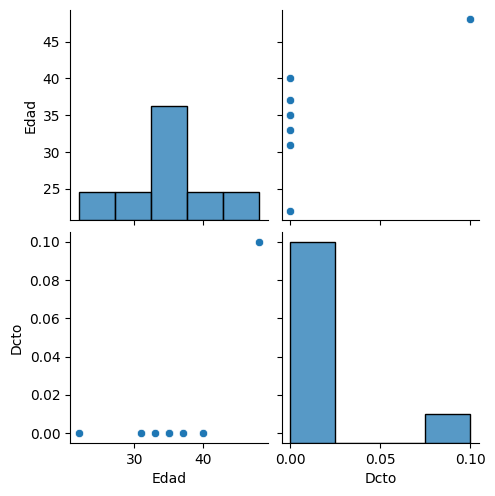

In [134]:
#Grafico tipo pairplot
sns.pairplot(df_clase)

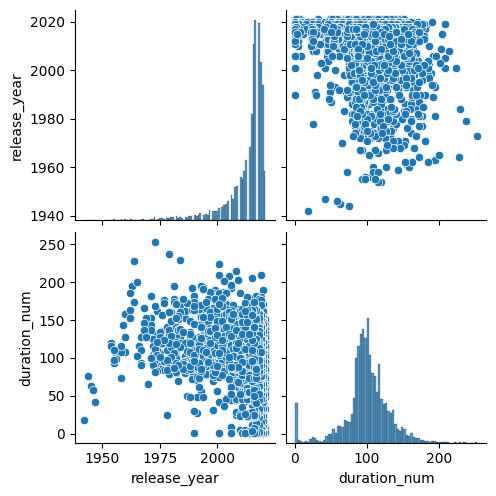

In [135]:
#Eliminar fila con duplicados y nulos
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#Visualizar
sns.pairplot(df)

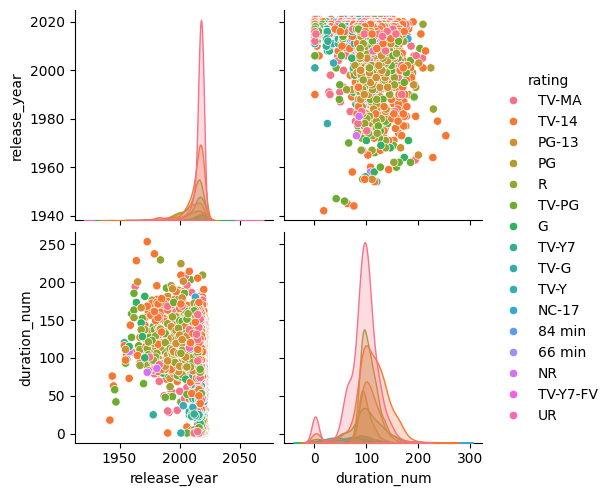

In [136]:
#Visualize pairplot of df
sns.pairplot(df, hue="rating")